<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='../../pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [29]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random
import scipy as sp
# import requests
# import tensorflow as tf
# import tensorflow.keras as keras
# import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [30]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h3>Data verzamelen</h3>
<p>
Download <a href="http://madm.dfki.de/files/sentinel/EuroSAT.zip">EuroSAT.zip</a> en kopieer daaruit de directory 2750 naar opdrachten/practica/pics.      
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore zodat je de plaatjes niet naar je remote git repository pusht</strong>
</p>    

<h3>Dataset filteren</h3>

In [31]:
riverDirectory = '../../pics/2750/River'
edgeFiles = list()
 
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)

    if ".jpg" in imgFile:
        edgeFiles.append(imgFile)

<h3>Exercise 1</h3>
<p>
    Voeg de directory Highway toe aan de <u>list</u> edgeFiles zodat ook de Highway images worden meegenomen. 
</p>

In [32]:
# Oplossing

highwayDirectory = '../../pics/2750/Highway'
 
for filename in os.listdir(highwayDirectory):
    imgFile = os.path.join(highwayDirectory, filename)
    
    if ".jpg" in imgFile:
        edgeFiles.append(imgFile)
    
len(edgeFiles)    

5000

<h3>Data transformeren</h3>
<p>
Image filters zijn Tensors en om die toe te kunnen passen zetten we de images eerst om naar Tensors m.b.v. Numpy.
</p>    

In [33]:
imageTensors = [np.asarray(Image.open(pic)).astype('uint8')/255 for pic in edgeFiles]
nrOfImages = len(imageTensors)

<p>
De tensors bevatten alleen de numerieke data van de images, om die te kunnen herleiden tot de oorspronkelijke images hebben we ook een lijst met de corresponderende labels nodig. De labels kunnen we afleiden uit de bestandsnamen.    
</p>    

In [34]:
labelNames, labelNumbers = ([], [])

for i, fileName in enumerate(edgeFiles):
    labelNames.append(fileName.split('/')[4])
    labelNumbers.append(i)

**Controleer de data**

In [35]:
print(f"De eerste Image heeft label {labelNames[0]}")
print(f"De laatste Image heeft label {labelNames[nrOfImages-1]}")

De eerste Image heeft label River
De laatste Image heeft label Highway


<h3>Data visualisen</h3>

In [36]:
# Oplossing

def showImages():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        
        # Maak een 4 x 4 raster van Images
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)        
                
        # Geef de bij de index behorende Image weer
        plt.imshow(imageTensors[i])
        
        # Vermeld de Imagelabel
        plt.xlabel( f"{labelNames[labelNumbers[i]]} {labelNumbers[i]}" ) 

    plt.show()           

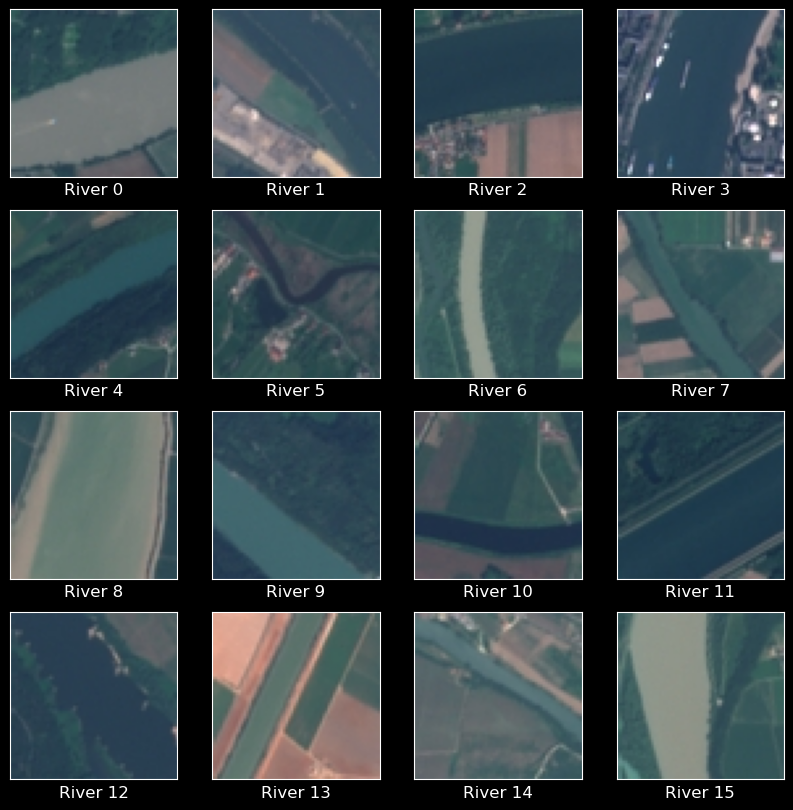

In [37]:
showImages() 

<h3>Exercise 2</h3>
<p>
Pas de functie <u>showImages()</u> aan zodat deze <u>random</u> images uit de dataset selecteert.<br>
<strong>Let erop dat bij iedere image het corresponderende label getoond wordt</strong>
</p>

In [38]:
# Oplossing

def showRandomImages():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        
        # Maak een 4 x 4 raster van Images
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)        
        
        # Selecteer een willekeurige index uit de lijst
        randInd = random.randint(0, nrOfImages)
        
        # Geef de bij de index behorende Image weer
        plt.imshow(imageTensors[randInd])
        
        # Vermeld de Imagelabel
        plt.xlabel( f"{labelNames[labelNumbers[randInd]]} {labelNumbers[randInd]}" ) 

    plt.show()           

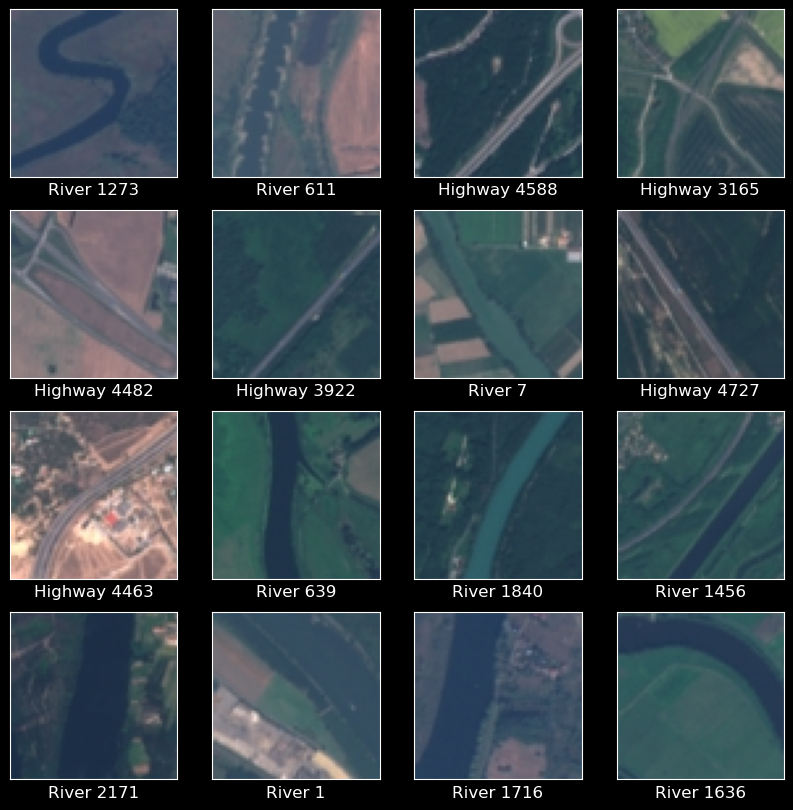

In [39]:
showRandomImages()

<h3>Edge Detection</h3>
<p>
De Highway en River images    
</p>    

In [48]:
def convolve(inputImg, imgKernel):
    outputImg = np.empty_like(inputImg)

    for dim in range(inputImg.shape[-1]):  # loop over rgb channels
        outputImg[:, :, dim] = sp.signal.convolve2d(inputImg[:, :, dim], imgKernel, mode="same", boundary="symm")

    return outputImg

def convert(arr, fill_value=1):
    """Add an alpha channel to an RGB array"""
    if arr.shape[-1] >= 4:
        return arr
    
    arr2 = np.full(shape=(*arr.shape[:-1], 4),
                   fill_value=fill_value,
                   dtype=arr.dtype)
    arr2[:, :, :-1] = arr/255.

    return arr2

In [50]:
plt.style.use('dark_background') 
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 7)

In [51]:
imgFile = "../../pics/2750/Highway/Highway_12.jpg"
# T = 10  # seconds
# fps = 30
# fTotal = T*fps  # total number of frames
imgKernels = { "Sharpen 3x3": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) }

**Selecteer de Image Kernel voor Convolution**

In [52]:
kernelName = "Sharpen 3x3"
kernel = imgKernels[kernelName]

In [53]:
imgData = convert(plt.imread(imgFile).astype(float))
imgDisplay = np.copy(imgData)
imgFiltered = convolve(imgData, kernel)
imgFiltered[:, :, -1] = 1

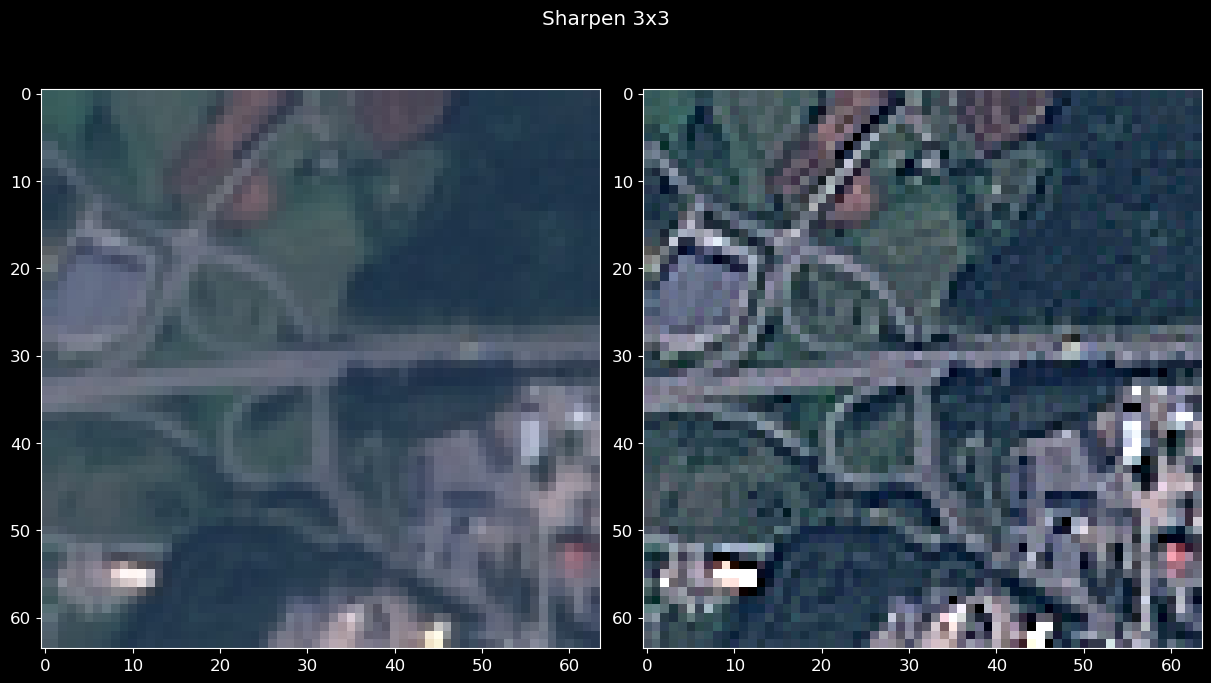

In [54]:
fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Sharpen 3x3")
imL = axL.imshow(np.clip(imgData, 0, 1) , interpolation="none")  # remove interpolation=...
imR = axR.imshow(np.clip(imgFiltered, 0, 1), interpolation="none")  # remove interpolation=...
# axR.set_xlim(axL.get_xlim()), axR.set_ylim(axL.get_ylim())
# axL.axis('off'), axR.axis('off')

<h3>Exercise 3</h3>
<p>
    Voeg een 3x3 imageKernel <u>horizontalEdgeDetection</u> toe aan <u>imgKernels</u> en voer daarmee een aantal Convoluties uit.<br> 
    Vergelijk de resultaten met die van de Convoluties met de Sharpen 3x3.<br>
    <strong>Tips</strong>: 
    <ul>
        <li>In de sheets kun je een voorbeeld van een verticale Edge Detection Filter vinden.</li>
        <li>Schrijf een functie voor <i>batchverwerking</i> op Images.</li>
    </ul>
</p>